In [46]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, BasicAer, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

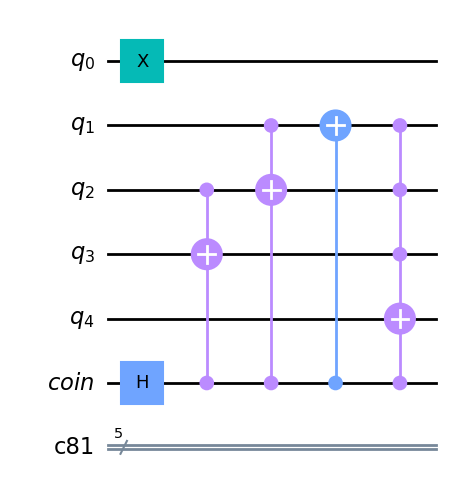

In [123]:
def from_even(qc):
    """
    Parameters:
        qc (QuantumCircuit): The QuantumCircuit object that represents the original circuit
    """
    q = qc.qubits
    coin = q[len(q)-1]
    N = len(q)-1

    qc.x(0)
    qc.h(coin)
    for i in range(N-2, 1, -1):
        qc.ccx(q[i-1], coin, q[i])
    
    qc.cx(coin, q[1])
    ctrls = [q[i] for i in range(1, N-1)]
    ctrls.append(coin)
    qc.mcx(ctrls, q[N-1])
    
    # qc.barrier()
    return qc
    

def from_odd(qc):
    """
    Parameters:
        qc (QuantumCircuit): The QuantumCircuit object that represents the original circuit
    """
    q = qc.qubits
    coin = q[len(q)-1]
    N = len(q)-1

    qc.x(0)
    qc.h(coin)
    qc.x(coin)

    ctrls = [q[i] for i in range(1, N-1)]
    ctrls.append(coin)
    qc.mcx(ctrls, q[N-1])
    qc.cx(coin, q[1])
    
    for i in range(2, N-1):
        qc.ccx(q[i-1], coin, q[i])

    qc.x(coin)
    # qc.barrier()

    return qc

N = 5
qce = from_even(QuantumCircuit(QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N)))
qce.draw('mpl', style='clifford')

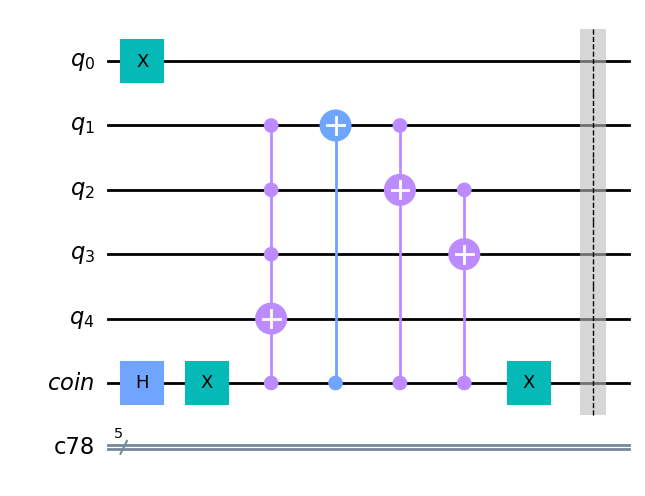

In [116]:
qco = from_odd(QuantumCircuit(QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N)))
qco.draw('mpl', style='clifford')

In [120]:
s = Statevector.from_label('001110')
s = s.evolve(qce)
s.draw('latex')

<IPython.core.display.Latex object>

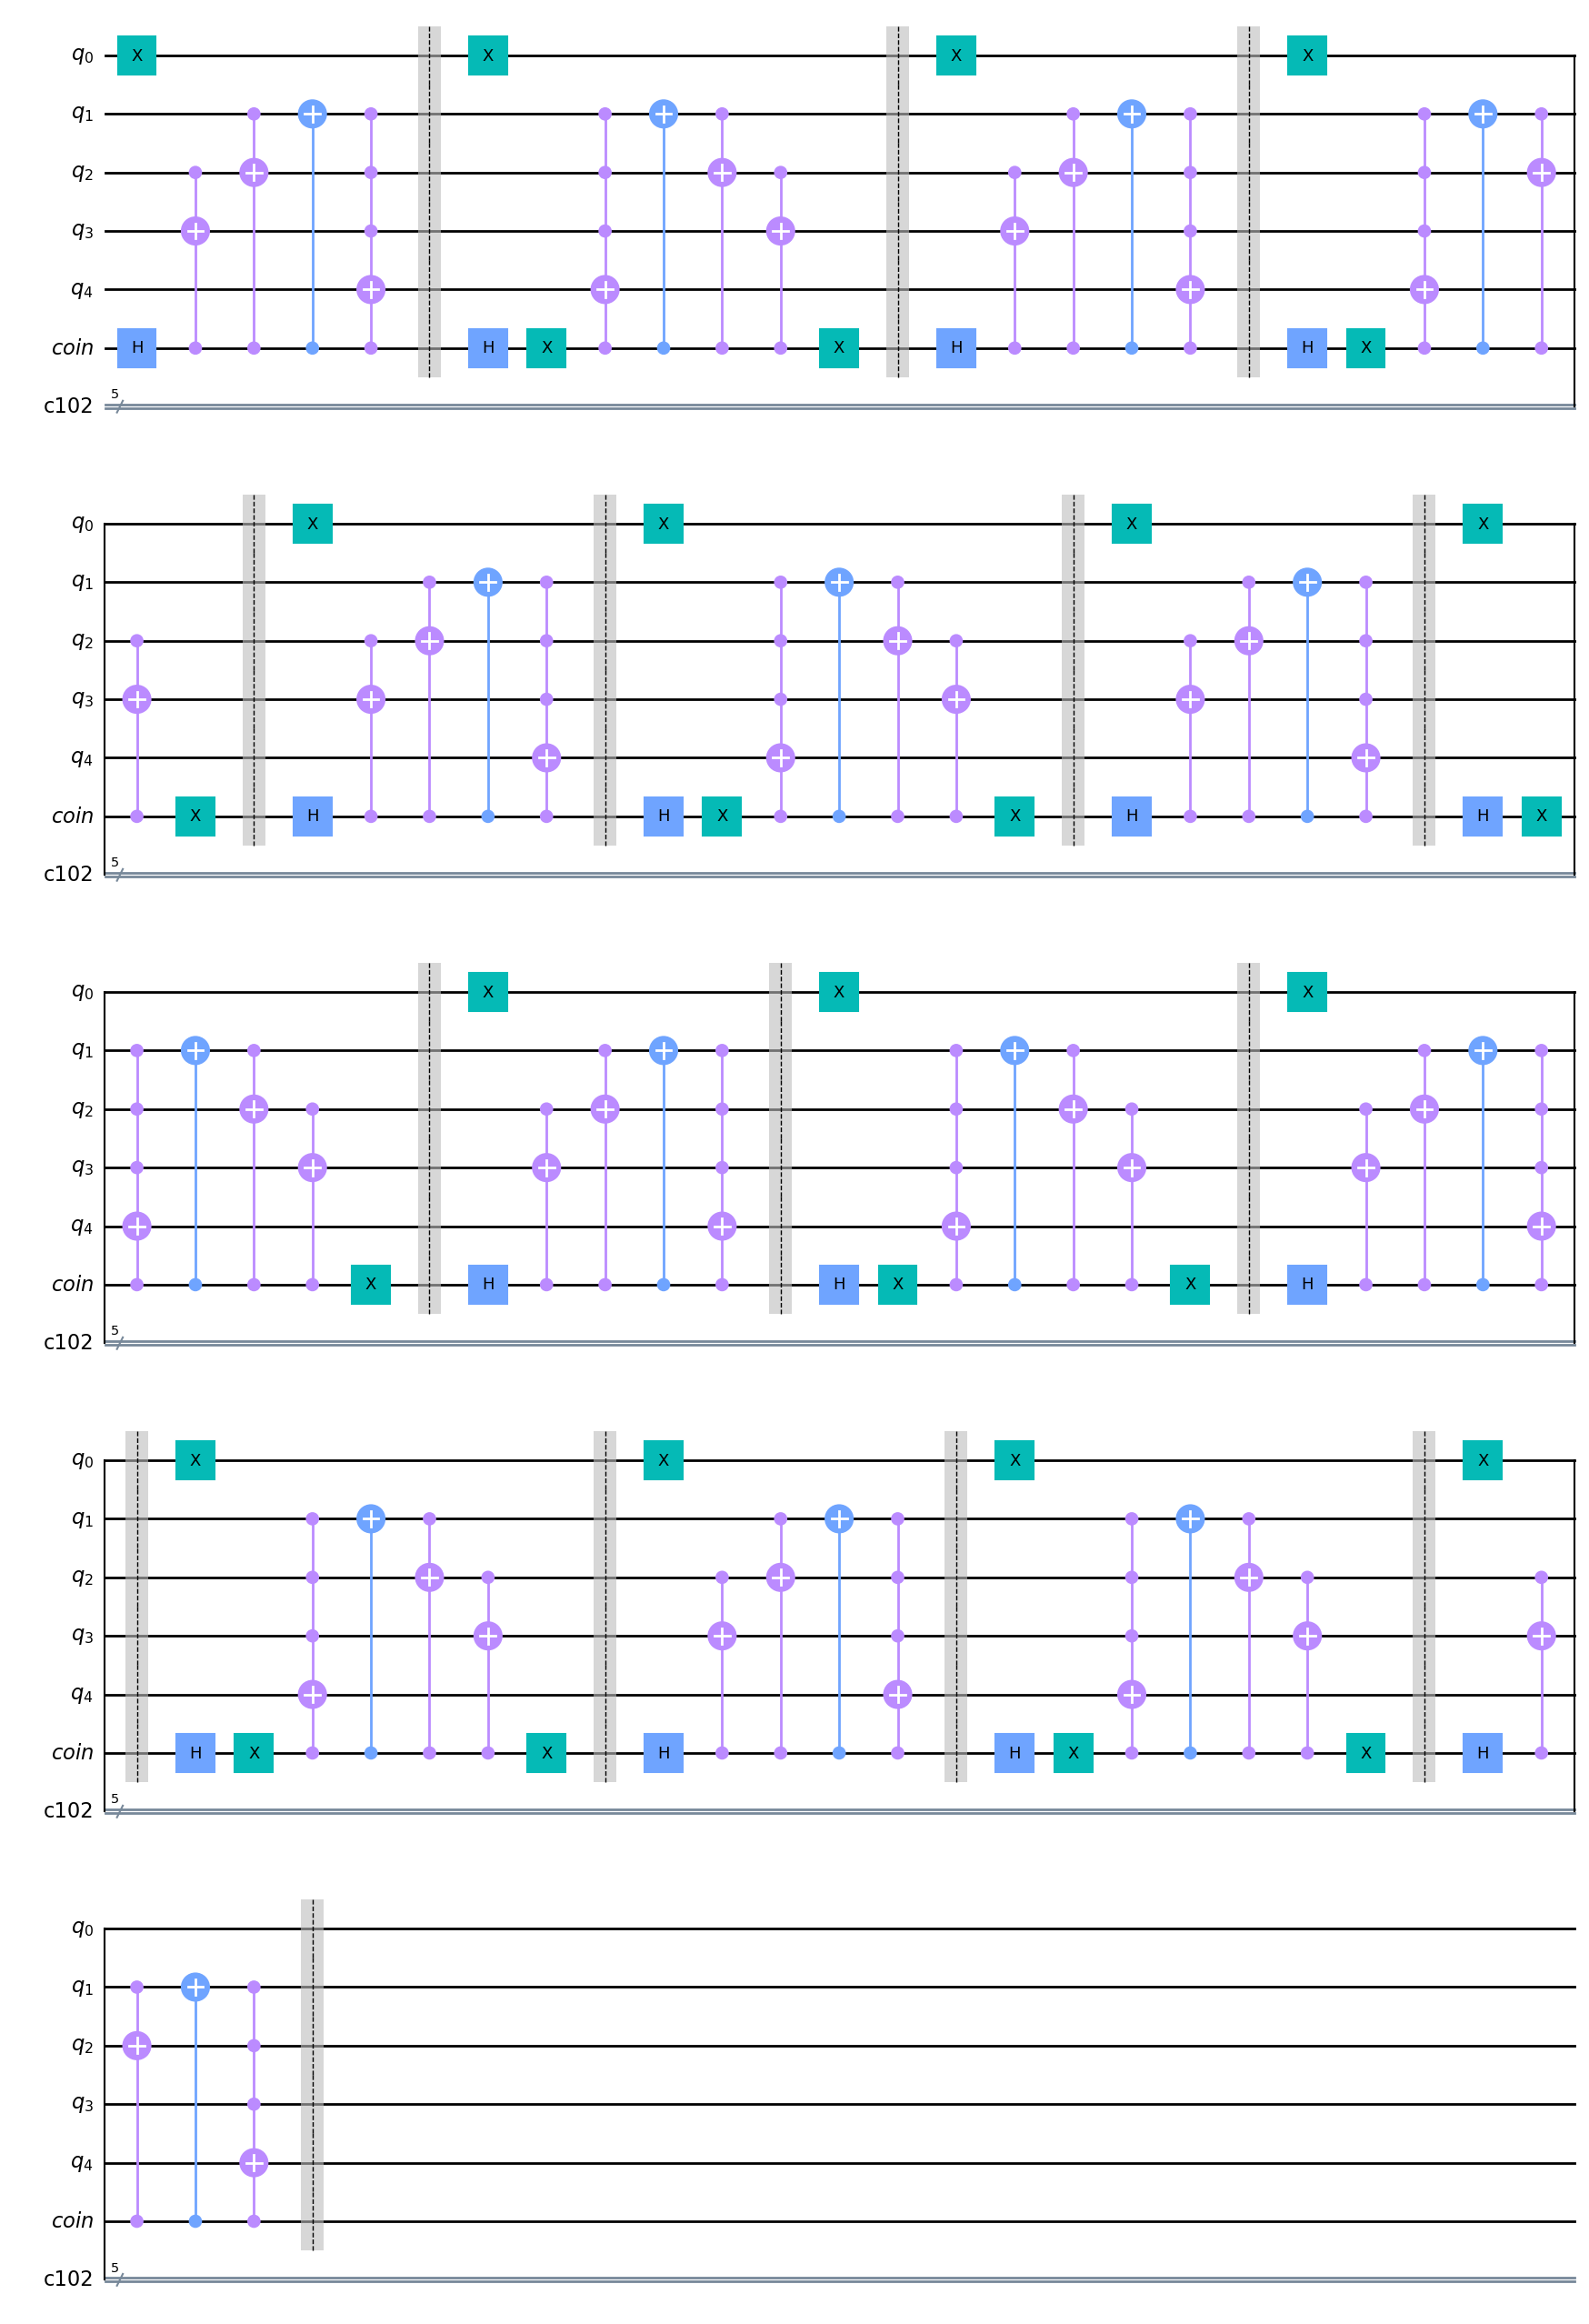

In [131]:
def prepare_circuit(N):
    """
    Parameters:
        N (int): Number of qubits
    """
    qc = QuantumCircuit(QuantumRegister(N, 'q'), QuantumRegister(1, 'coin'), ClassicalRegister(N))
    n_toss = ((2**N)-1)//2
    for i in range(n_toss):
        if i % 2 == 0:
            qc = from_even(qc)
            qc.barrier()
        else:
            qc = from_odd(qc)
            qc.barrier()
    return qc

N = 5
qc = prepare_circuit(N)
qc.draw('mpl', style='clifford')

/home/biswayannandi/.local/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


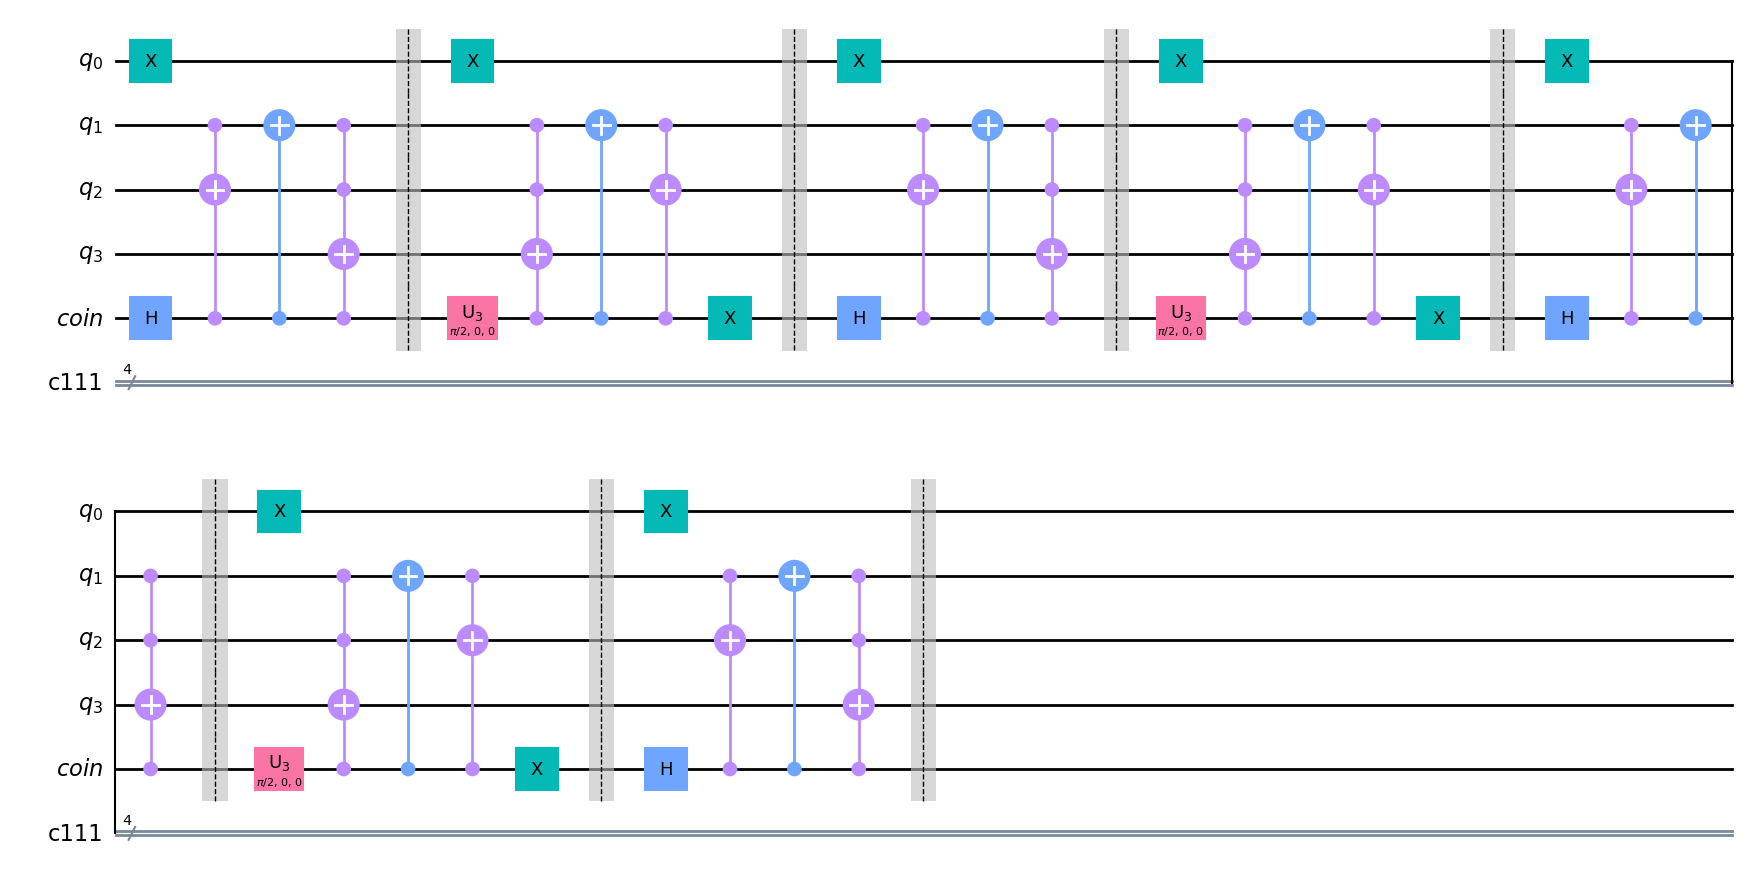

In [136]:
transpile(prepare_circuit(4)).draw('mpl')